<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

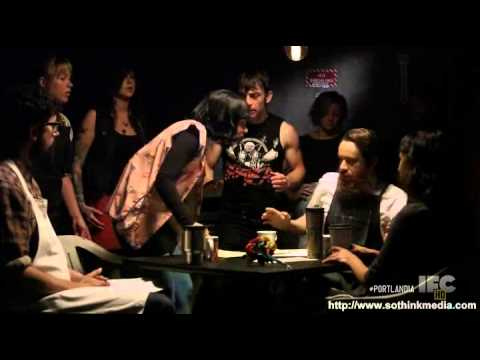

In [34]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [35]:
%pwd

'C:\\Users\\JayBeast\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head(12)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating


In [37]:
print(df['coffee_shop_name'].value_counts())
df['star_rating'].value_counts()


Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64


 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [38]:
df['star_rating'] = df['star_rating'].apply(lambda x: x.lower())
df['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [39]:
df['coffee_shop_name'] = df['coffee_shop_name'].apply(lambda x: x.lower())
df['coffee_shop_name'].value_counts()

epoch coffee                            400
halcyon                                 300
the factory - cafe with a soul          244
venezia italian gelato                  200
houndstooth coffee                      200
                                       ... 
lucky lab coffee                         25
sister coffee                            17
kowabunga coffee                         16
the marvelous vintage tea party co.      10
lola savannah coffee downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [40]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [41]:
df.shape

(7616, 3)

In [42]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [43]:
df['tokens'] = df['full_review_text'].apply(tokenize)
df['tokens'].head()


0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

In [44]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with..."


In [47]:
df['rating'] = df['star_rating'].apply(lambda x: x.replace(' star rating', '')).astype('float')
del df['star_rating']



KeyError: 'star_rating'

In [48]:
df.head()

,coffee_shop_name,full_review_text,tokens,rating
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,...",5.0
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb...",4.0
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo...",4.0
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni...",2.0
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with...",4.0


In [49]:
df_good = df.loc[df.rating >= 4]
df_good.shape

(6140, 4)

In [50]:
df_bad = df.loc[df.rating <=3]
df_bad.shape

(1476, 4)

In [51]:
df_bad['tokens'] = df_bad['full_review_text'].apply(tokenize)
df_bad['tokens'].head()

C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3     [11252016, very, cool, decor, good, drinks, ni...
8     [10252016, 1, checkin, ok, lets, try, this, ap...
11    [11202016, the, store, has, a, decoration, but...
12    [11172016, 1, checkin, listed, in, 2016, the, ...
25    [1222016, okay, so, after, visiting, my, frien...
Name: tokens, dtype: object

In [52]:
df_good['tokens'] = df_good['full_review_text'].apply(tokenize)
df_good['tokens'].head()

C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
4    [1232016, 1, checkin, they, are, located, with...
5    [11202016, 1, checkin, very, cute, cafe, i, th...
Name: tokens, dtype: object

In [53]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [54]:
wcbad = count(df_bad['tokens'])
wcbad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,the,1368,8193,1.0,0.045513,0.045513,0.926829
8,and,1319,5339,2.0,0.029659,0.075172,0.893631
121,i,1184,5285,3.0,0.029359,0.104530,0.802168
57,a,1263,5049,4.0,0.028048,0.132578,0.855691
231,to,1201,4401,5.0,0.024448,0.157026,0.813686


In [55]:
wcgood = count(df_good['tokens'])
wcgood.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,the,5479,26616,1.0,0.044245,0.044245,0.892345
8,and,5545,21311,2.0,0.035426,0.079671,0.903094
63,a,4983,17706,3.0,0.029433,0.109104,0.811564
33,i,4344,14952,4.0,0.024855,0.133960,0.707492
1,to,4452,12763,5.0,0.021216,0.155176,0.725081


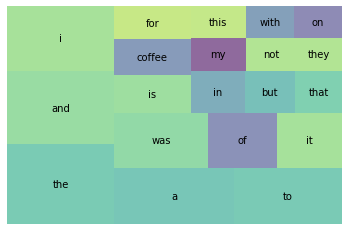

In [56]:
import squarify
import matplotlib.pyplot as plt

wcbad_top20 = wcbad[wcbad['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wcbad_top20['word'], alpha=.6)
plt.axis('off')
plt.show()

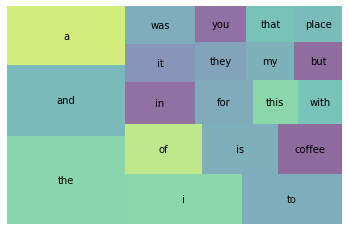

In [57]:
wcgood_top20 = wcgood[wcgood['rank'] <= 20]

squarify.plot(sizes=wcgood_top20['pct_total'], label=wcgood_top20['word'], alpha=.6)
plt.axis('off')
plt.show()

In [58]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [59]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df_bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df_bad['tokens'] = tokens

C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df_good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df_good['tokens'] = tokens

C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '1', 'like', "it's", "i'm", "i've", "don't", '-' ])

In [28]:
#STOP_WORDS

In [62]:
tokens = []

for doc in tokenizer.pipe(df_bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS and (token.is_punct == False) and (token.pos_ != 'PRON'):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df_bad['tokens'] = tokens

C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [63]:
tokens = []

for doc in tokenizer.pipe(df_good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS and (token.is_punct == False) and (token.pos_ != 'PRON'):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df_good['tokens'] = tokens

C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [64]:
df_bad.head()

,coffee_shop_name,full_review_text,tokens,rating
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,"[11/25/2016, cool, decor!, good, drinks, nice,...",2.0
8,the factory - cafe with a soul,"10/25/2016 1 check-in Ok, let's try this appr...","[10/25/2016, check-in, ok,, let's, try, approa...",3.0
11,the factory - cafe with a soul,"11/20/2016 The store has A+ decoration, but h...","[11/20/2016, store, a+, decoration,, honestly,...",3.0
12,the factory - cafe with a soul,11/17/2016 1 check-in Listed in 2016 - The Th...,"[11/17/2016, check-in, listed, 2016, time, cha...",3.0
25,the factory - cafe with a soul,"12/2/2016 Okay, so after visiting my friends ...","[12/2/2016, okay,, visiting, friends, la, tryi...",1.0


In [65]:
df_good.head()

,coffee_shop_name,full_review_text,tokens,rating
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,"[11/25/2016, check-in, love, love, loved, atmo...",5.0
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...","[12/2/2016, listed, date, night:, austin,, amb...",4.0
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11/30/2016, check-in, listed, brunch, spots, ...",4.0
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,"[12/3/2016, check-in, located, northcross, mal...",4.0
5,the factory - cafe with a soul,11/20/2016 1 check-in Very cute cafe! I think...,"[11/20/2016, check-in, cute, cafe!, think, mom...",4.0


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [42]:
# Want to find out how often these 20 words appear in 1-3 and 4-5 star ratings
# can divide database into 1-3, and 4-5 star ratings, and first compare the sns.lineplot(x='rank', y='cul_pct_total', data=wc_newest.head(20)); and then find top 20 words for 1-3 and 4-5 star ratings



In [66]:
wc1 = count(df_bad['tokens'])
wc1.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,coffee,827,1637,1.0,0.019205,0.019205,0.560298
139,place,597,875,2.0,0.010265,0.029470,0.404472
37,good,441,599,3.0,0.007027,0.036498,0.298780
59,food,266,369,4.0,0.004329,0.040827,0.180217
43,check-in,359,359,5.0,0.004212,0.045039,0.243225


In [67]:
wc2 = count(df_good['tokens'])
wc2.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,coffee,3383,6421,1.0,0.021315,0.021315,0.550977
143,place,2432,3389,2.0,0.011250,0.032564,0.396091
145,great,2174,2902,3.0,0.009633,0.042198,0.354072
273,good,1643,2180,4.0,0.007237,0.049434,0.267590
32,love,1263,1604,5.0,0.005324,0.054759,0.205700


In [72]:
wc2.rename(columns={'appears_in_pct':'appears_in_pct_good'}, inplace=True)

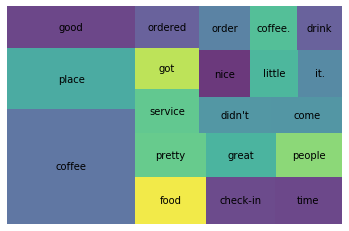

In [73]:
wc_bad_top20 = wc1[wc1['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

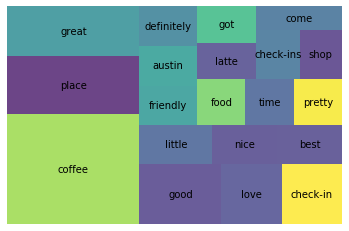

In [74]:
wc_good_top20 = wc2[wc2['rank'] <= 20]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [75]:
# find difference in wcgood and wcbad counts 

wc3 = wc_bad_top20
wc4 = wc_good_top20

In [76]:
dfcombo= pd.concat([wc3, wc4], axis=1)
dfcombo.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct_good
2,got,237.0,300.0,11.0,0.003520,0.068373,0.160569,got,743.0,947.0,17.0,0.003144,0.097676,0.121010
6,service,261.0,314.0,10.0,0.003684,0.064854,0.176829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,check-in,1598.0,1602.0,6.0,0.005318,0.060076,0.260261
11,coffee,827.0,1637.0,1.0,0.019205,0.019205,0.560298,latte,713.0,949.0,16.0,0.003150,0.094533,0.116124
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coffee,3383.0,6421.0,1.0,0.021315,0.021315,0.550977
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pretty,788.0,990.0,15.0,0.003286,0.091383,0.128339
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,love,1263.0,1604.0,5.0,0.005324,0.054759,0.205700
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shop,775.0,910.0,19.0,0.003021,0.103784,0.126221
36,nice,226.0,267.0,15.0,0.003132,0.081748,0.153117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,good,441.0,599.0,3.0,0.007027,0.036498,0.298780,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
import pandas as pd
import numpy as np

dfcombo['appears_in_pct'] = dfcombo['appears_in_pct'].replace(np.nan, 0)
dfcombo['appears_in_pct_good'] = dfcombo['appears_in_pct_good'].replace(np.nan, 0)
dfcombo.head(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct_good
2,got,237.0,300.0,11.0,0.003520,0.068373,0.160569,got,743.0,947.0,17.0,0.003144,0.097676,0.121010
6,service,261.0,314.0,10.0,0.003684,0.064854,0.176829,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,check-in,1598.0,1602.0,6.0,0.005318,0.060076,0.260261
11,coffee,827.0,1637.0,1.0,0.019205,0.019205,0.560298,latte,713.0,949.0,16.0,0.003150,0.094533,0.116124
14,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,coffee,3383.0,6421.0,1.0,0.021315,0.021315,0.550977
25,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,pretty,788.0,990.0,15.0,0.003286,0.091383,0.128339
32,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,love,1263.0,1604.0,5.0,0.005324,0.054759,0.205700
34,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,shop,775.0,910.0,19.0,0.003021,0.103784,0.126221
36,nice,226.0,267.0,15.0,0.003132,0.081748,0.153117,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
37,good,441.0,599.0,3.0,0.007027,0.036498,0.298780,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [79]:
dfcombo['diff'] = dfcombo['appears_in_pct'] - dfcombo['appears_in_pct_good']
dfcombo.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct_good,diff
2,got,237.0,300.0,11.0,0.003520,0.068373,0.160569,got,743.0,947.0,17.0,0.003144,0.097676,0.121010,0.039559
6,service,261.0,314.0,10.0,0.003684,0.064854,0.176829,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.176829
8,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,check-in,1598.0,1602.0,6.0,0.005318,0.060076,0.260261,-0.260261
11,coffee,827.0,1637.0,1.0,0.019205,0.019205,0.560298,latte,713.0,949.0,16.0,0.003150,0.094533,0.116124,0.444174
14,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,coffee,3383.0,6421.0,1.0,0.021315,0.021315,0.550977,-0.550977


In [ ]:
#mapping ={" 1.0 star rating":1, " 2.0 star rating":2, " 3.0 star rating":3, " 4.0 star rating":4, " 5.0 star rating":5}

#df = df.replace({" 1.0 star rating": mapping,  " 2.0 star rating": mapping, " 3.0 star rating": mapping, " 4.0 star rating": mapping, " 5.0 star rating": mapping})


#df.head(34)



In [ ]:
#df["star_rating"]=df["star_rating"].replace(" 1.0 star rating", 1) 
#df.head(29)

In [ ]:
#df=df.replace({'star_rating': " 1.0 star rating"}, 1)
#df.head(29)

In [ ]:
#mapping ={' 1.0 star rating':1, ' 2.0 star rating':2, ' 3.0 star rating':3, ' 4.0 star rating':4, ' 5.0 star rating':5}

#df = df.replace({' 1.0 star rating': mapping, ' 2.0 star rating': mapping, ' 3.0 star rating': mapping, ' 4.0 star rating': mapping, ' 5.0 star rating': mapping})


#df.head(34)

In [ ]:
#df_great = df.loc[df.star_rating == ' 4.0 star rating']
#df_great.shape


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

